#   **29 October 2025**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

rng = np.random.default_rng();

##  "Shotgun" Method

Consider the following integral below:

$$ I = \int_{0}^{1}{\sqrt{1-x^2}dx}$$

4 x I = 3.1288


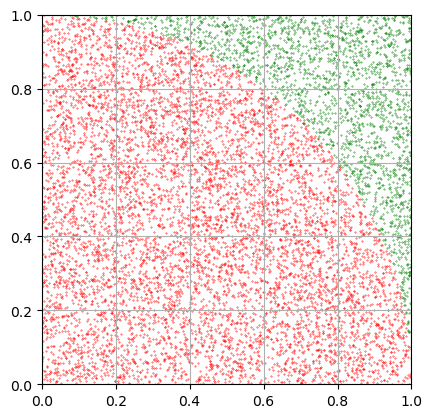

In [155]:
N_samp = np.int32(1E4)
x = rng.random(size=N_samp)
y = rng.random(size=N_samp)

r = np.sqrt(x**2 + y**2)
is_inclu = (r <= 1)                  #   Note that this array contains Boolean values.

inside_ratio = np.sum(is_inclu)/N_samp
print(f'4 x I = {4*inside_ratio}')

fig, ax = plt.subplots()
ax.scatter(x[is_inclu], y[is_inclu], s=0.1, c='red')
ax.scatter(x[~is_inclu], y[~is_inclu], s=0.1, c='green')
ax.set(xlim=[0,1], ylim=[0,1], aspect='equal')
ax.grid(1)

Now, consider $N$-dimensional unit spheres ($r=1$), where $N\in \{1, \dots, 10 \}$. Let us use Monte-Carlo integration to determine the volume of each, and check which one has the higher volume.

$$V(r,d)=\frac{(\pi r^2)^{\frac{d}{2}}}{\Gamma\left(\frac{d}{2}+1\right)}$$

where $d$ is the number of dimensions. When $r=1$,

$$V(r,d)=\frac{\pi^{\frac{d}{2}}}{\Gamma\left(\frac{d}{2}+1\right)}$$

However, note that the radius of any hypersphere is defined by

$$r = \sum_i^d x_i^2$$

In [204]:
N_samp = np.int32(1E6)
N_dim = np.linspace(2, 10, 9)
dims = np.int32(N_dim)

#   Generates x_i's according to dimension.
def x_i_gen(n_dim):
    x_i_list = []
    for i in range(n_dim): 
        x_i_list.append(rng.random(size=N_samp))
    return np.array(x_i_list)

#   Evaluates r = \Sum{ x_i^2 }
def r_func(x_i):
    r_i = np.copy(x_i)
    r = np.sum(r_i**2, axis=0)
    return np.sqrt(r)

def count_inclu(r_var):
    is_inclu = (r_var <= 1)
    inside_ratio = np.sum(is_inclu)/N_samp
    return inside_ratio

V = np.zeros(len(N_dim))
for i in range(len(N_dim)):
    V[i] = 2**dims[i]*count_inclu(r_func(x_i_gen(i)))
    print(f'Volume of unit {dims[i]:>2}-sphere =  {V[i]:>10.10f}')
#r_n = [[np.sum(i**2) for i in j] for j in x_i]

Volume of unit  2-sphere =  0.0000040000
Volume of unit  3-sphere =  8.0000000000
Volume of unit  4-sphere =  12.5758400000
Volume of unit  5-sphere =  16.7506240000
Volume of unit  6-sphere =  19.7146880000
Volume of unit  7-sphere =  21.0033920000
Volume of unit  8-sphere =  20.6018560000
Volume of unit  9-sphere =  18.9096960000
Volume of unit 10-sphere =  16.3031040000


##  Rejection, Importance Sampling

Consider this integral:

$$I = \int_{-\infty}^{+\infty}{\frac{e^{-x^2}}{\sqrt{x^2+1}}dx}$$

where Wolfram Alpha returns 
> $I = \sqrt{e}K_0(\frac{1}{2}) \approx 1.52411$

In [ ]:
#   Graphs the integrand.
x = np.linspace(-2.5, 2.5, 1000)
curve = np.exp(-x**2) / np.sqrt(x**2+1)

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

In [168]:
# Draw from N(0, 1/sqrt(2)) ~ (1/sqrt(pi))*exp(-x^(-2))
x = rng.normal(0, 1/np.sqrt(2), size=100000)
# Take the average. f has to cancel the (1/sqrt(pi)) from p(x)
expect = np.mean(np.sqrt(np.pi)/(np.sqrt(1 + x**2)))
print(expect)


my_int = lambda x: np.exp(-x**2)/np.sqrt(1 + x**2)
quad_out, err = sp.integrate.quad(my_int, -np.inf, np.inf)
print(quad_out)

1.5239781207628535
1.5241093857739092


Consider the form

$$I = \int_{-\infty}^{+\infty}{f(x)\ p(x)\ dx}$$

where with random variable $X$ with probability distribution $p(x)$, we are actually finding the expectation value $\braket{f(x)}_X$.

Suppose $F(x) = f(x)p(x)$. Then for some definite bounds $x \in [a, b]$, we have

$$\int_{a}^{b}{F(x) dx} = \int_{a}^{b}{f(x)\ p(x)\ dx}$$

where from inverse sampling, we obtain
$$g(x) = \int_{a}^{x}{p(x^\prime)\ dx^\prime}$$

such that $$\int_{a}^{b}{p(x^\prime)\ dx^\prime} = 1$$
and so $p(x^\prime)$ would be a Cumulative Distribution Function.

After that, we get the inverse of $g(x)$, $g^{-1}(x)$.

Only after all of that can we sample from our specified (in this case, Gaussian) distribution, but we change our variables $x \to u$ such that $u \in [0, b-a]$.

We then evaluate $f(g^{-1}(u))$ for all values of $u$:

\begin{align}
    \int_{a}^{b}{F(x) dx} &= \int_{0}^{b-a}{f(g^{-1}(u))\ du} \\
    &\approx \frac{b-a}{n}\sum_{i}{f(g^{-1}(u_i))}
\end{align}

Of course, given any function $F(x)$, we must first identify $f(x)$ and $p(x)$.

In [ ]:
x = np.linspace(1e-8, 1e6, 100)

def f(x): pass
def p(x): pass

def g(x):
    

![Some integrals to solve.](./week11/integrals.png)